### 병합군집(Agglomrative Clustering)

`병합군집알고리즘`은 시작할 때 각 포인트를 하나의 클러스터로 지정하고, 그 다음 특정 종료조건을 만족할 때까지 가장 비슷한 두 클러스터를 합쳐 나가는 알고리즘이다. scikit-learn에서 사용하는 `종료조건은 클러스터의 개수`로 지정된 개수의 클러스터가 남을 때까지 비슷한 클러스터를 합친다. `linkage`옵션에서 가장 비슷한 클러스터를 측정하는 방법을 지정한다. 이 측정방법은 항상 두개의 클러스터 사이에서 이워진다.

병합군집은 `계층적군집 Hierarchical Clustering`을 만든다. 군집이 반복하여 진행되면 모든 포인트는 하나의 포인트를 가진 클러스터에서 시작하여 마지막 클러스터까지 이동하게 된다. 즉, 작은 클러스터들이 모여서 큰 클러스터를 이루는 계층적구조를 가지는 것이다.

* 계층적군집
 - 계층적군집이란 계층적 트리모형을 이용하여 개별 데이터 포인트들을 순차적, 계층적으로 유사한 클러스터로 통합하여 군집화를 수행하는 알고리즘이다. k-Menas알고리즘과는 달리 클러스터의 갯수를 사전에 정하지 않아도 학습을 수행할 수 있다. 계층적군집에는 개개의 포인트를 순차적으로 병합하는 `상향식 병합군집방식 Agglomerative Clustering`과 전체를 하나의 클러스터로 보고 그것을 분할해 나가는 `하향식 분할군집방식 Divisive Clustering`이 있다.
 
* scikit-learn에서 구현된 옵션
 - `word` : 기본값인 ward 연결(linkage)은 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합친다. 그래서 크기가 비슷한 클러스터가 만들어 진다.
 - `average` : average연결은 클러스터 포인트사이의 평균거리가 가장 짧은 두 클러스터를 합친다.
 - `complete` : complete 연결(최대연결)은 클러스터 포인트 사이의 최대거리가 가장 짧은 두 클러스터를 합친다.
 - word옵션이 대부분의 데이터셋에 알맞기 때문에 이 옵션을 가장 많이 사용한다.
 
<img src="./images/29.머신러닝_비지도학습_3_병합군집_1.png" width="400" height="300">
 
>* 병합군집은 알고리즘 특성상 새로운 데이터포인트에 대해서는 예측할 수가 없다. 그러므로 `병합군집은 predict함수가 없다`.
* 그 대신 훈련세트로 모델을 만들고 클러스터정보를 얻기 위해 `fit_predice gkatn`를 사용한다.
* 병합군집은 `적절한 클러스터의 갯수를 선택`하는데 도움이 된다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams['figure.dpi'] = 200
# plt.rcParams['image.cmap'] = "gray"
# plt.rcParams['axes.xmargin'] = 0.05
# plt.rcParams['axes.ymargin'] = 0.05

import mglearn

##### 실습 1. 병합군집의 과정

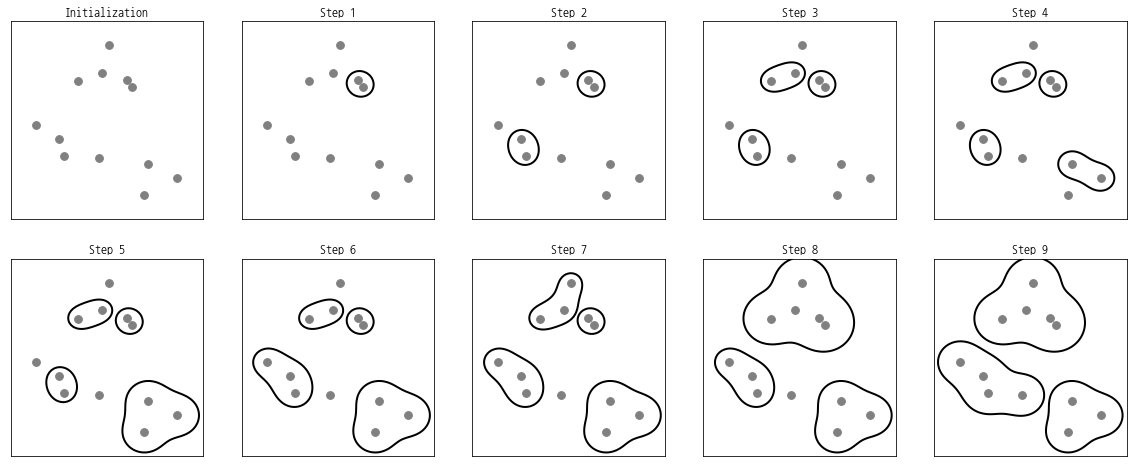

In [2]:
# 예를 들어 세개의 클러스터를 찾는다고 가정한 병합군집의 과정
mglearn.plots.plot_agglomerative_algorithm()

# 결과분석
# 초기에는 각 데이터포인트 하나 하나가 클러스터이다. 그 다음단계에서 가장 가까운 두 클러스터가 합쳐진다. 
# setp4까지는 포인트가 하나 뿐인 클러스터가 합쳐져서 두개의 포인트를 갖는 하나의 클러스터가 되었다.
# setp5에서 2개의 포인트를 갖는 클러스터들이 세개의 포인트로 확장된다. 이런식으로 계속진행하게 되어 3개의
# 클러스터를 찾는다고 지정했다면 이 알고리즘은 여기서 중지하게 된다.

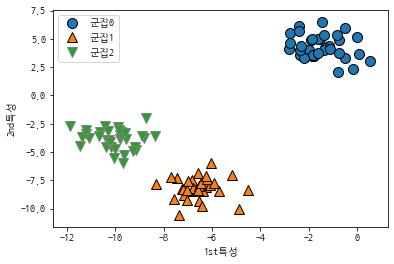

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.legend(["군집0", "군집1", "군집2"], loc="best")
plt.xlabel("1st특성"); plt.ylabel("2nd특성")
plt.show()

##### 실습 2. 계층적군집(Hierachical Clustering)과  덴드로그램(Dendrogram)

병합군집은 `계층적 군집`을 만든다. 군집이 반복하여 진행되면 모든 포인트는 하나의 포인트를 가진 클러스터에서 시작하여 마지막 클러스터까지 이동하게 된다. 각 중간단계는 데이터에 대한 (각기 다른 갯수의)클러스터를 생성한다. 이는 가능한 모든 클러스터를 연결해 보는데 도움이 된다.

<img src="./images/29.머신러닝_비지도학습_3_병합군집_2.png" width="400" height="300">

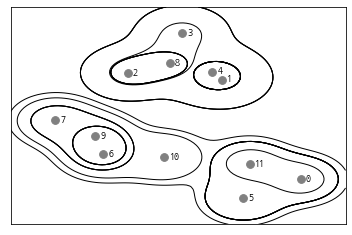

In [4]:
# 병합군집으로 생성한 계층적 군집과 번호가 매겨진 데이터포인트의 예제
mglearn.plots.plot_agglomerative()

# 결과분석
# 아래 그래프는 계층군집의 모습을 자세하게 나타내지만 2차원데이터이며 특성이 3개 이상인 데이터셋은 그래프를
# 그릴 수 없기 때문에 사용할 수 었다.
# 계층군집을 시각화도구는 덴드로그램을 사용하여 다차원 데이터셋을 처리할 수가 있다.
# scikit-learn에서는 아직까지 지원하지 않지만 scipy를 사용해서 쉽게 그릴 수가 있다.

scikit-learn에서는 덴드로그래프를 그리는 기능을 제공하지 않지만 `scipy`에서 덴드로그램을 지원하는데 `scipy군집알고리즘`은 scikit-learn군집알고리즘과는 인터페이스가 조금 다르다. `scipy`에서는 데이터배열 X를 받아 계층군집의 유사도가 들어 있는 연결배열 `linkage arrary`를 반환하는 함수를 제공한다. 이 연결배열을 `scipy의 dendrogram함수`에 전달하면 덴드로그램그래프를 그릴 수가 있다.

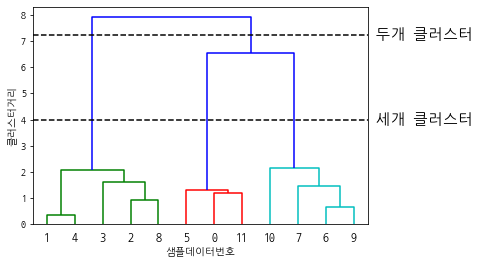

In [5]:
# scipy에서 ward군집함수와 덴드로그램함수를 import
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

# 데이터배열 X에 ward함수를 적용한다.
# scipy의 ward함수는 병합군집을 수행할 때 생성된 거리정보가 담긴 배열을 리턴한다.
linkage_array = ward(X)

# 클러스터간의 거리정보가 담긴 linkage_array를 사용해 덴드로그램을 그리기
dendrogram(linkage_array)

# 각 클러스터를 구분하는 커트라인 그리기
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' 두개 클러스터', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, ' 세개 클러스터', va='center', fontdict={'size':15})
plt.xlabel("샘플데이터번호")
plt.ylabel("클러스터거리")
plt.show()

# 결과분석
# 덴드로그램의 y축이 단순히 두 클러스터가 합쳐지는 것만 나타내는 것이 아니라 합쳐진 클러스터가 얼마나
# 떨어져 있는지를 보여준다. 이 가지의 길이는 합쳐진 클러스터가 떨어져 있는 거리를 나타낸다.